##**Logistic Regression**
#### Logistic Regression: Classification with Iris Dataset

---

### **1. Introduction**

Logistic Regression is a statistical method used for binary and multiclass classification tasks. It models the probability that a given input belongs to a certain class using the logistic (sigmoid) function.

For the **Iris Dataset**, logistic regression is used to classify iris species based on their features.

---

### **2. Key Concepts**

#### **a. Logistic Function**

The logistic function maps input values to probabilities between 0 and 1:

\[$P(y = 1 | X) = \frac{1}{1 + e^{-(X\beta)}}$\]

Where:
- \( $X$ \): Input features.
- \( $beta$ \): Model parameters.

#### **b. Multiclass Classification**

For multiclass problems like the Iris dataset, logistic regression uses the **softmax function** for prediction:

\[$P(y = c | X) = \frac{e^{X \beta_c}}{\sum_{j=1}^C e^{X \beta_j}}$\]

Where \( $C$ \) is the number of classes.

---

### **3. Python Implementation**

#### **a. Load and Explore the Iris Dataset**
```
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display first few rows
print(iris_df.head())

---

#### **b. Train-Test Split**

from sklearn.model_selection import train_test_split
#####Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **c. Train a Logistic Regression Model**

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##### Initialize logistic regression model
logistic_model = LogisticRegression(max_iter=200)

##### Train the model
logistic_model.fit(X_train, y_train)

##### Predict on test data
y_pred = logistic_model.predict(X_test)

---

#### **d. Evaluate the Model**

##### Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

##### Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

##### Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

---

#### **e. Visualize the Results**

import seaborn as sns
import matplotlib.pyplot as plt

##### Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
```
---

### **4. Results and Analysis**

#### **a. Model Accuracy**
The logistic regression model achieves a high accuracy score, typically over 95% on the Iris dataset due to its simplicity.

#### **b. Classification Report**
The classification report provides precision, recall, and F1-score for each class:
- **Precision**: Proportion of true positive predictions among all predicted positives.
- **Recall**: Proportion of true positives identified among actual positives.
- **F1-Score**: Harmonic mean of precision and recall.

#### **c. Confusion Matrix**
The confusion matrix shows how well the model distinguishes between the three species.

---

### **6. Advantages of Logistic Regression**

1. **Interpretability**: Coefficients provide insights into feature importance.
2. **Efficiency**: Fast to train, even on large datasets.
3. **Probabilistic Output**: Provides class probabilities.
4. **Multiclass Capability**: Extends to multiple classes using softmax.

---

### **7. Limitations**

1. **Linear Decision Boundary**: Assumes linear separability.
2. **Sensitive to Outliers**: Performance may degrade in the presence of extreme values.
3. **Feature Scaling**: Requires features to be standardized for better convergence.

---

### **8. Conclusion**

Logistic regression is an effective and interpretable algorithm for classifying the Iris dataset. Its performance can be further enhanced by feature scaling and hyperparameter tuning (e.g., adjusting the regularization strength).

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


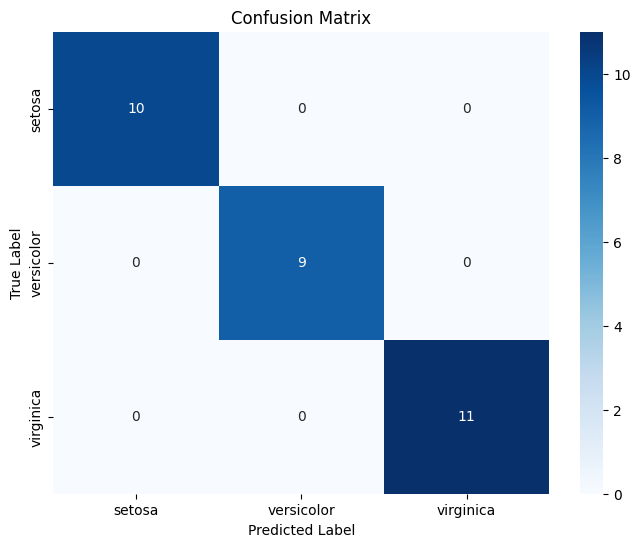

In [25]:
### **5. Code Summary**

#Full code implementation:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

# Predictions
y_pred = logistic_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


##**Bayesian Logistic Regression: Classification with the Iris Dataset**

---

### **1. Introduction**

Bayesian Logistic Regression combines the probabilistic framework of logistic regression with Bayesian inference. Unlike standard logistic regression, which provides point estimates of model parameters, Bayesian logistic regression provides a posterior distribution over the parameters, capturing their uncertainty.

For the **Iris Dataset**, Bayesian logistic regression can classify species while quantifying uncertainty in predictions.

---

### **2. Key Concepts**

#### **a. Logistic Regression and Bayesian Framework**

Logistic regression models the probability of a class \($ y$ \) given input features \( $X$ \):

\[
$P(y = 1 | X, \beta) = \sigma(X\beta) = \frac{1}{1 + e^{-(X\beta)}}$
\]

Where:
- \( $\sigma$ \): Sigmoid function.
- \( $\beta$ \): Model coefficients.

Bayesian regression adds priors to the parameters \( $\beta$ \):

\[
$P(\beta | X, y) \propto P(y | X, \beta) P(\beta)$
\]

#### **b. Priors**

A prior distribution reflects prior knowledge about the parameters \($ \beta$ \):
- **Gaussian Prior** (most common):
  \[
  $P(\beta) = \mathcal{N}(\mu, \Sigma)$
  \]
  - \( $\mu$ \): Mean of the prior (often 0).
  - \( $\Sigma$ \): Covariance matrix (controls uncertainty).

#### **c. Posterior Distribution**

Using Bayes’ theorem:
\[
$P(\beta | X, y) = \frac{P(y | X, \beta) P(\beta)}{P(y | X)}$
\]

The posterior is often approximated using techniques like **Laplace approximation**, **Markov Chain Monte Carlo (MCMC)**, or **variational inference** due to its complexity.

#### **d. Prediction**

The predictive distribution for a new data point \( X_{\text{new}} \):
\[
$P(y_{\text{new}} = 1 | X_{\text{new}}, X, y) = \int \sigma(X_{\text{new}} \beta) P(\beta | X, y) d\beta$
\]

This integrates over the posterior, capturing uncertainty in predictions.

---

### **4. Results and Analysis**

#### **a. Posterior Summary**
The posterior distribution of the coefficients and intercept shows the uncertainty in their estimates.

#### **b. Prediction**
Predicted probabilities incorporate uncertainty from the posterior distribution, providing confidence in classifications.

#### **c. Evaluation**
The accuracy, classification report, and confusion matrix evaluate the model’s performance.

---

### **6. Advantages and Limitations**

#### **Advantages**
1. Explicitly models uncertainty in parameters and predictions.
2. Robust to overfitting for small datasets via prior regularization.
3. Probabilistic framework enables better decision-making.

#### **Limitations**
1. Computationally intensive for large datasets.
2. Requires expertise in setting priors and interpreting results.

---

### **7. Conclusion**

Bayesian Logistic Regression enhances standard logistic regression by quantifying uncertainty in predictions. It is particularly useful for datasets where uncertainty is critical for decision-making.

Creating Bayesian Logistic Regression without specialized probabilistic programming libraries like **PyMC3** requires manually implementing a Bayesian approach. We can use **NumPy** for matrix operations and Monte Carlo sampling methods, such as **Metropolis-Hastings**, to approximate the posterior.

Here is a step-by-step implementation:

---

### Bayesian Logistic Regression without `pymc3`

---

### **1. Monte Carlo Sampling for Posterior Approximation**

We approximate the posterior \( $P(\beta | X, y)$ \) using **Metropolis-Hastings**.

#### Key Steps:
1. **Log-likelihood**: Compute \($ P(y | X, \beta)$ \) using logistic regression likelihood.
2. **Prior**: Define a Gaussian prior for \( $\beta$ \).
3. **Posterior**: Combine the prior and likelihood.
4. **Sampling**: Use Metropolis-Hastings to sample from the posterior.

---

### **2. Implementation**

#### **a. Load and Preprocess the Data**

```python
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = load_iris()
X = iris.data
y = (iris.target != 0).astype(int)  # Binary classification: Setosa (0) vs Non-Setosa (1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```

---

#### **b. Define Helper Functions**

1. **Logistic Sigmoid Function**:
   ```python
   def sigmoid(z):
       return 1 / (1 + np.exp(-z))
   ```

2. **Log-likelihood**:
   ```python
   def log_likelihood(X, y, beta):
       """
       Computes the log-likelihood for logistic regression.
       """
       z = np.dot(X, beta)
       probs = sigmoid(z)
       return np.sum(y * np.log(probs) + (1 - y) * np.log(1 - probs))
   ```

3. **Gaussian Prior**:
   ```python
   def gaussian_prior(beta, mu=0, sigma=10):
       """
       Computes the log of the Gaussian prior.
       """
       return -0.5 * np.sum((beta - mu) ** 2) / sigma**2
   ```

4. **Posterior**:
   ```python
   def log_posterior(X, y, beta, mu=0, sigma=10):
       """
       Combines log-likelihood and Gaussian prior to compute the log-posterior.
       """
       return log_likelihood(X, y, beta) + gaussian_prior(beta, mu, sigma)
   ```
---

#### **c. Metropolis-Hastings Sampler**

```python
def metropolis_hastings(X, y, n_samples=5000, step_size=0.1):
    """
    Metropolis-Hastings sampler for Bayesian Logistic Regression.
    """
    # Initialize parameters
    n_features = X.shape[1]
    beta = np.zeros(n_features)  # Start at zeros
    samples = []

    # Iterate for the number of samples
    for _ in range(n_samples):
        # Propose a new beta using a Gaussian step
        beta_proposal = beta + np.random.normal(0, step_size, size=n_features)

        # Compute posterior for current and proposed beta
        log_posterior_current = log_posterior(X, y, beta)
        log_posterior_proposed = log_posterior(X, y, beta_proposal)

        # Accept or reject the proposal
        acceptance_ratio = np.exp(log_posterior_proposed - log_posterior_current)
        if np.random.rand() < acceptance_ratio:
            beta = beta_proposal  # Accept proposal

        samples.append(beta)

    return np.array(samples)
```
---

#### **d. Train the Model**

```python
# Run the Metropolis-Hastings sampler
samples = metropolis_hastings(X_train, y_train, n_samples=2000, step_size=0.05)

# Take the mean of the posterior samples for coefficients
beta_posterior_mean = samples.mean(axis=0)
```
---

#### **e. Make Predictions**

```python
# Predict probabilities on test data
z_test = np.dot(X_test, beta_posterior_mean)
proba_test = sigmoid(z_test)

# Convert probabilities to binary predictions
predictions = (proba_test >= 0.5).astype(int)
```
---

#### **f. Evaluate the Model**

```python
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate predictions

print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, predictions))


# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(conf_matrix)
```
---

### **4. Analysis**

- **Accuracy**: Performance is similar to standard logistic regression for well-separated data.
- **Posterior Samples**: Provide insights into uncertainty around the coefficients.
- **Limitations**: Metropolis-Hastings can be slow for high-dimensional data.

This implementation showcases Bayesian logistic regression without relying on specialized libraries.

In [26]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Log-likelihood
def log_likelihood(X, y, beta):
    z = np.dot(X, beta)
    probs = sigmoid(z)
    return np.sum(y * np.log(probs) + (1 - y) * np.log(1 - probs))

# Gaussian prior
def gaussian_prior(beta, mu=0, sigma=10):
    return -0.5 * np.sum((beta - mu) ** 2) / sigma**2

# Log-posterior
def log_posterior(X, y, beta, mu=0, sigma=10):
    return log_likelihood(X, y, beta) + gaussian_prior(beta, mu, sigma)

# Metropolis-Hastings sampler
def metropolis_hastings(X, y, n_samples=5000, step_size=0.1):
    n_features = X.shape[1]
    beta = np.zeros(n_features)
    samples = []

    for _ in range(n_samples):
        beta_proposal = beta + np.random.normal(0, step_size, size=n_features)
        log_posterior_current = log_posterior(X, y, beta)
        log_posterior_proposed = log_posterior(X, y, beta_proposal)
        acceptance_ratio = np.exp(log_posterior_proposed - log_posterior_current)
        if np.random.rand() < acceptance_ratio:
            beta = beta_proposal
        samples.append(beta)

    return np.array(samples)

# Load dataset
iris = load_iris()
X = iris.data
y = (iris.target != 0).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Bayesian logistic regression
samples = metropolis_hastings(X_train, y_train, n_samples=2000, step_size=0.05)
beta_posterior_mean = samples.mean(axis=0)

# Predictions
z_test = np.dot(X_test, beta_posterior_mean)
proba_test = sigmoid(z_test)
predictions = (proba_test >= 0.5).astype(int)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, predictions))

conf_matrix = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0]
 [ 0 20]]


##**Evaluation of Classifiers**
Evaluating the performance of classifiers is crucial for assessing how well a model distinguishes between classes in a dataset. This involves using various metrics and techniques to measure the effectiveness of the classification algorithm.

---

### **1. Metrics for Classification Evaluation**

#### **A. Accuracy**
- **Definition**: The ratio of correctly predicted instances to the total number of instances.
  \[
  $\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Instances}}$
  \]
- **Pros**: Easy to compute and interpret.
- **Cons**: Misleading for imbalanced datasets (e.g., when one class dominates).

#### **B. Precision**
- **Definition**: The ratio of correctly predicted positive instances to all instances predicted as positive.
  \[
  $\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$
  \]
- **Use Case**: Important in scenarios where false positives are costly (e.g., spam detection).

#### **C. Recall (Sensitivity or True Positive Rate)**
- **Definition**: The ratio of correctly predicted positive instances to all actual positive instances.
  \[
  $\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$
  \]
- **Use Case**: Important in scenarios where false negatives are costly (e.g., medical diagnosis).

#### **D. F1-Score**
- **Definition**: The harmonic mean of precision and recall.
  \[
  $\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$
  \]
- **Use Case**: A balanced measure when precision and recall are equally important.

#### **E. Specificity (True Negative Rate)**
- **Definition**: The ratio of correctly predicted negative instances to all actual negative instances.
  \[
  $\text{Specificity} = \frac{\text{True Negatives}}{\text{True Negatives} + \text{False Positives}}$
  \]
- **Use Case**: Used alongside recall for evaluating binary classifiers.

#### **F. Receiver Operating Characteristic (ROC) Curve and AUC**
- **ROC Curve**: Plots the true positive rate (recall) against the false positive rate at various threshold levels.
- **Area Under the Curve (AUC)**: Measures the overall performance of the classifier.
  - AUC = 1: Perfect classifier.
  - AUC = 0.5: Random guessing.

#### **G. Logarithmic Loss (Log Loss)**
- **Definition**: Measures the uncertainty of predictions by penalizing incorrect predictions based on their probabilities.
  \[
  $\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$
  \]
- **Use Case**: Important for probabilistic models where confidence matters.

#### **H. Confusion Matrix**
- **Definition**: A table that summarizes the performance of a classifier by showing true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

|               | Predicted Positive | Predicted Negative |
|---------------|---------------------|---------------------|
| **Actual Positive** | True Positive (TP)    | False Negative (FN)   |
| **Actual Negative** | False Positive (FP)   | True Negative (TN)    |

---

### **2. Model Selection Metrics**

#### **A. Cross-Validation**
- Split the dataset into training and validation subsets multiple times to ensure performance is consistent across different splits.

#### **B. Learning Curves**
- Visualize the training and validation performance against the training size to identify underfitting or overfitting.

#### **C. Precision-Recall Curve**
- Evaluates performance when dealing with imbalanced datasets by plotting precision vs. recall for various thresholds.

---

### **3. Imbalanced Dataset Challenges**

For imbalanced datasets, accuracy might be misleading. Use:
- Precision-Recall AUC.
- F1-Score.
- Class-specific metrics (e.g., recall for the minority class).

---

### **5. Conclusion**

1. **Choose Metrics Wisely**: Metrics should align with the problem's goals and the cost of errors.
2. **Imbalanced Data**: Use precision, recall, F1-score, or AUC-PR for better evaluation.
3. **Visualization**: Use ROC, precision-recall curves, and learning curves to better understand the model's performance.


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



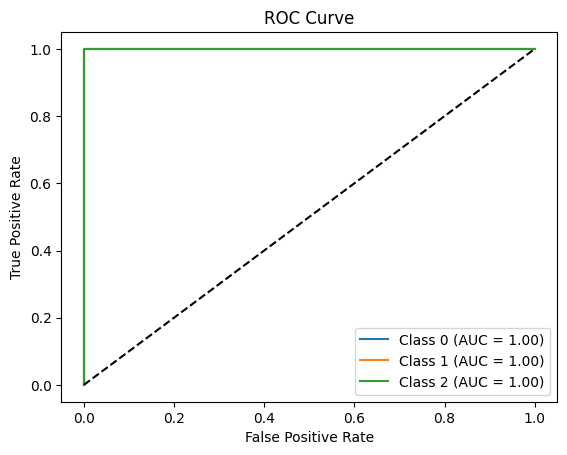

In [27]:
### **4. Python Implementation for Classifier Evaluation**

#Using the **Iris dataset** for illustration:

#### **Step 1: Train a Classifier**
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#### **Step 2: Evaluate the Classifier**
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, classification_report
)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Precision, Recall, F1-Score (for multi-class, use average='weighted')
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

#### **Step 3: Plot ROC Curve**

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = clf.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

##**OVerfitting, Underfitting, Bias, Variance**
### **Overfitting, Underfitting, Bias, and Variance**

---

#### **Definitions**
1. **Overfitting**:
   - The model learns not only the underlying pattern but also the noise in the training data.
   - Symptoms:
     - High training accuracy but low testing accuracy.
     - Poor generalization to unseen data.
   - Example: Using a very complex model for simple data.

2. **Underfitting**:
   - The model is too simple to capture the underlying pattern in the data.
   - Symptoms:
     - Low accuracy on both training and testing data.
   - Example: Using a linear model for nonlinear data.

3. **Bias**:
   - Error due to overly simplistic assumptions in the learning algorithm.
   - High bias leads to underfitting.

4. **Variance**:
   - Error due to the model's sensitivity to small fluctuations in the training data.
   - High variance leads to overfitting.

---

### **Steps for Demonstration with the Iris Dataset**

We’ll train models of varying complexity on the Iris dataset and visualize their bias-variance tradeoff.

---

### **3. Analyze Results**

- **Underfitting**: Low accuracy for both training and testing at shallow tree depths (e.g., `max_depth=1`).
- **Overfitting**: High training accuracy but a drop in testing accuracy at very deep tree depths (e.g., `max_depth=10+`).
- **Bias**: Observed during underfitting (simple models fail to capture complexity).
- **Variance**: Observed during overfitting (complex models are too sensitive to training data).

---

### **4. Addressing Overfitting and Underfitting**

#### **Techniques to Address Overfitting**:
1. Pruning for Decision Trees.
2. Adding regularization (e.g., L1/L2 penalties).
3. Using simpler models.
4. Gathering more data or augmenting existing data.

#### **Techniques to Address Underfitting**:
1. Use more complex models.
2. Add more relevant features to the dataset.
3. Reduce regularization.

---


### **6. Summary**

1. **Overfitting**: Observed with very complex models (e.g., deep trees).
2. **Underfitting**: Observed with overly simplistic models (e.g., shallow trees).
3. **Bias**: High in underfitting scenarios due to overly simplistic assumptions.
4. **Variance**: High in overfitting scenarios due to sensitivity to noise in training data.
5. **Ideal Model**: A balance between bias and variance, achieved by tuning hyperparameters and regularization.

In [28]:
### **1. Data Preparation**

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

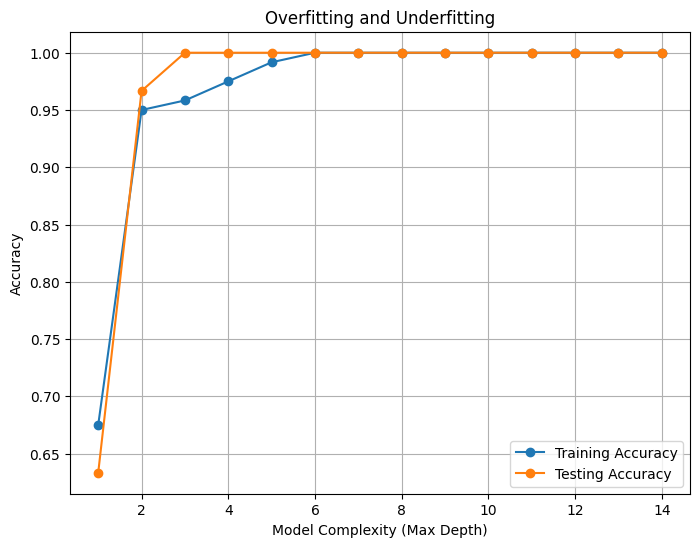

In [29]:
### **2. Train Models of Varying Complexity**

#We’ll train Decision Tree classifiers with varying depths (complexity) to demonstrate overfitting and underfitting.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_accuracies = []
test_accuracies = []
max_depths = range(1, 15)

# Train models with varying max_depth
for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Compute accuracies
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(max_depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depths, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Model Complexity (Max Depth)')
plt.ylabel('Accuracy')
plt.title('Overfitting and Underfitting')
plt.legend()
plt.grid(True)
plt.show()

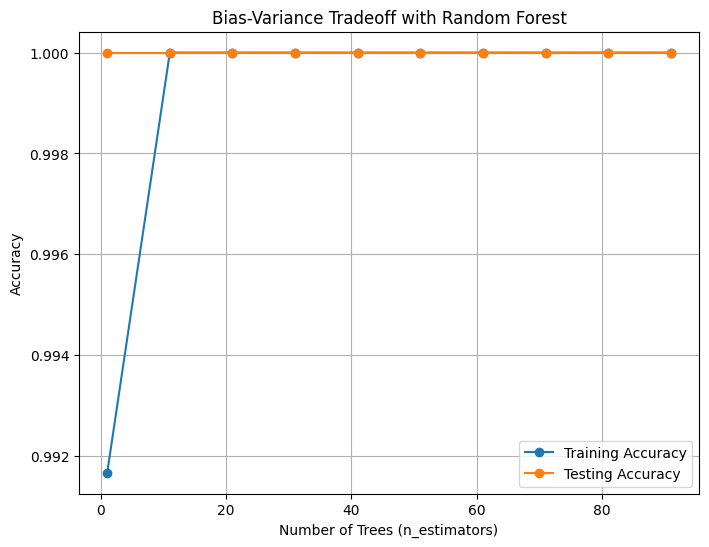

In [30]:
### **5. Bias-Variance Tradeoff Visualization**

#We can also demonstrate the bias-variance tradeoff using a Random Forest model by varying the number of estimators (trees).

from sklearn.ensemble import RandomForestClassifier

train_accuracies_rf = []
test_accuracies_rf = []
n_estimators = range(1, 101, 10)

# Train Random Forest models with varying number of trees
for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)

    # Compute accuracies
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    train_accuracies_rf.append(train_acc)
    test_accuracies_rf.append(test_acc)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(n_estimators, train_accuracies_rf, label='Training Accuracy', marker='o')
plt.plot(n_estimators, test_accuracies_rf, label='Testing Accuracy', marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Bias-Variance Tradeoff with Random Forest')
plt.legend()
plt.grid(True)
plt.show()

##**Decision Trees**
### **Decision Trees**

#### **Introduction**
Decision trees are a popular and interpretable machine learning algorithm used for both classification and regression tasks. The model splits the data into subsets based on feature values, forming a tree-like structure where decisions are made at each node.

---

### **1. How Decision Trees Work**
1. **Nodes**:
   - **Root Node**: The top-most node where the splitting starts.
   - **Internal Nodes**: Intermediate nodes where further splitting occurs.
   - **Leaf Nodes**: The final nodes representing the predicted outcomes.
   
2. **Splitting**:
   - Decision trees divide data by choosing a feature and threshold that results in the best split according to a criterion.

3. **Splitting Criteria**:
   - **For Classification**:
     - **Gini Impurity**: Measures the impurity of a node. Lower impurity is better.
       \[
       Gini = 1 - \sum_{i=1}^n (p_i^2)
       \]
     - **Entropy**: Measures the information gain during splits.
       \[
       Entropy = -\sum_{i=1}^n p_i \log_2(p_i)
       \]
   - **For Regression**:
     - **Mean Squared Error (MSE)**: Splits minimize the variance of values in each subset.

---

### **2. Advantages of Decision Trees**
- Easy to understand and interpret (visualizable).
- Can handle both numerical and categorical data.
- No need for feature scaling or normalization.
- Can model nonlinear relationships.

---

### **3. Disadvantages of Decision Trees**
- Prone to **overfitting**, especially with deep trees.
- Sensitive to small changes in data (can lead to different splits).
- Often requires **pruning** or regularization to improve generalization.

---

### **4. Regularization Techniques**
1. **Max Depth**: Limit the maximum depth of the tree.
2. **Min Samples Split**: Minimum number of samples required to split a node.
3. **Min Samples Leaf**: Minimum number of samples required at a leaf node.
4. **Max Features**: Limit the number of features considered at each split.

---

#### **6. Addressing Overfitting and Underfitting**

1. **Underfitting**:
   - Occurs with a small max depth (e.g., `max_depth=1`).
   - Solution: Increase tree complexity by allowing deeper splits.

2. **Overfitting**:
   - Occurs with no depth limitation or very large trees.
   - Solution: Use regularization parameters like `max_depth`, `min_samples_split`, and `min_samples_leaf`.

---

### **7. Applications of Decision Trees**
- **Classification**:
  - Medical diagnosis.
  - Customer segmentation.
- **Regression**:
  - Predicting house prices.
  - Stock market analysis.

---

### **8. Advanced Variants**
- **Random Forest**: An ensemble of decision trees to improve accuracy and robustness.
- **Gradient Boosting Machines**: Build trees sequentially to minimize error.
- **XGBoost/LightGBM**: Optimized versions of gradient boosting.

By using decision trees appropriately with proper regularization, they can be powerful tools for both small and complex datasets!

Accuracy: 1.00


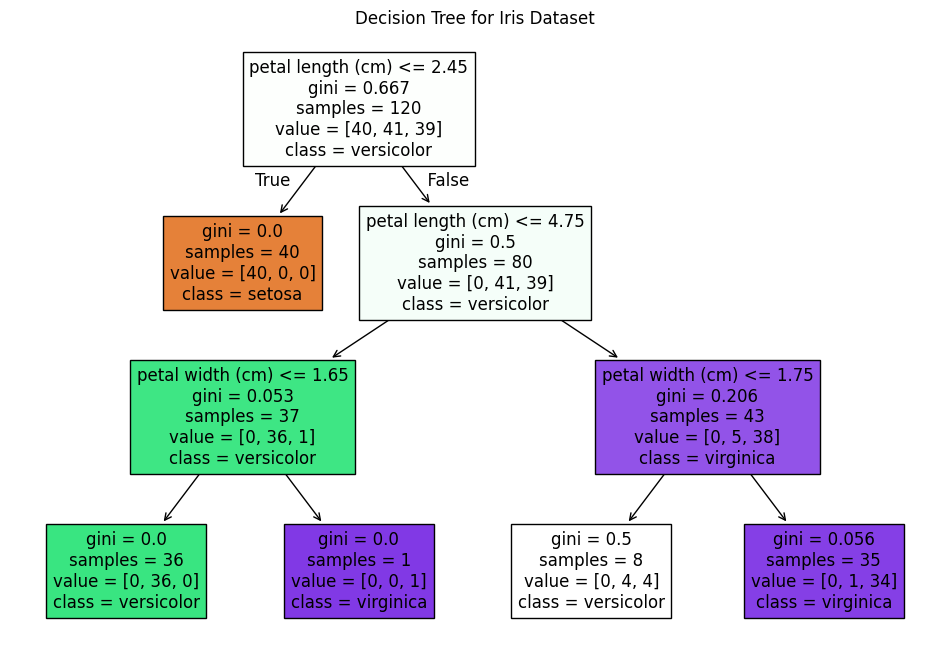

Max Depth: 1, Train Accuracy: 0.68, Test Accuracy: 0.63
Max Depth: 2, Train Accuracy: 0.95, Test Accuracy: 0.97
Max Depth: 3, Train Accuracy: 0.96, Test Accuracy: 1.00
Max Depth: 4, Train Accuracy: 0.97, Test Accuracy: 1.00
Max Depth: None, Train Accuracy: 1.00, Test Accuracy: 1.00


In [31]:
### **5. Python Implementation on the Iris Dataset**

#### **Step 1: Load Data and Train a Decision Tree**

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#### **Step 2: Visualize the Decision Tree**

# Visualize the tree structure
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree for Iris Dataset")
plt.show()

#### **Step 3: Experiment with Regularization**

# Experiment with different max_depth
for depth in [1, 2, 3, 4, None]:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Max Depth: {depth}, Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")


##**Naive Bayes**
### **Naive Bayes Classifier**

#### **Introduction**
Naive Bayes is a probabilistic classification algorithm based on Bayes' Theorem, which assumes the features are independent given the class label. Despite its simplicity and the often unrealistic independence assumption, Naive Bayes performs well in many real-world applications, especially for text classification.

---

### **1. Bayes' Theorem**

\[
$P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}$
\]

- \($P(C|X)$\): Posterior probability of class \($C$\) given the data \($X$\).
- \($P(X|C)$\): Likelihood of data \($X$\) given class \($C$\).
- \($P(C)$\): Prior probability of class \($C$\).
- \($P(X)$\): Evidence or probability of the data \($X$\).

---

### **2. Naive Bayes Assumption**
Naive Bayes assumes that features \($X_1, X_2, ..., X_n$\) are conditionally independent given the class \($C$\):
\[
$P(X|C) = P(X_1|C) \cdot P(X_2|C) \cdot ... \cdot P(X_n|C)$
\]

---

### **3. Types of Naive Bayes Classifiers**
1. **Gaussian Naive Bayes**:
   - Assumes features are normally distributed.
   - Commonly used for continuous data.
2. **Multinomial Naive Bayes**:
   - Suitable for discrete data like word counts in text classification.
3. **Bernoulli Naive Bayes**:
   - Designed for binary/boolean features.

---

### **4. Advantages**
- Simple to implement and fast to train.
- Performs well with high-dimensional datasets.
- Robust to irrelevant features.

### **5. Disadvantages**
- Relies on the strong independence assumption, which may not hold in all datasets.
- Performs poorly if the features are highly correlated.
- Requires enough data to estimate probabilities accurately.

---

### **7. Applications of Naive Bayes**
1. **Text Classification**:
   - Spam detection (e.g., Multinomial Naive Bayes).
   - Sentiment analysis.
2. **Medical Diagnosis**:
   - Classifying diseases based on symptoms.
3. **Recommender Systems**:
   - Predicting user preferences.
4. **Real-time Prediction**:
   - Due to its speed, Naive Bayes is useful for real-time applications.

---

### **8. Limitations**
1. **Independence Assumption**:
   - Rarely true in real-world data.
2. **Continuous Features**:
   - Gaussian Naive Bayes assumes normal distribution, which may not fit all continuous data.

Despite these limitations, Naive Bayes remains a powerful and efficient algorithm for certain use cases, particularly when feature independence is reasonable or for high-dimensional problems like text classification.

In [32]:
### **6. Python Implementation with the Iris Dataset**

#### **Step 1: Load Data**

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### **Step 2: Train Naive Bayes Classifier**

# Initialize Gaussian Naive Bayes
model = GaussianNB()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

#### **Step 3: Evaluate the Model**

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#### **Step 4: Explore Probabilities**

# Display class prior probabilities
print("Class Priors:")
print(model.class_prior_)

# Display class-specific mean and variance
print("Mean of Features by Class:")
print(model.theta_)  # Use model.theta_ for mean

print("Variance of Features by Class:")
print(model.var_)  # Use model.var_ for variance instead of model.sigma_

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Class Priors:
[0.33333333 0.34166667 0.325     ]
Mean of Features by Class:
[[4.99       3.4525     1.45       0.245     ]
 [5.9195122  2.77073171 4.24146341 1.32195122]
 [6.53333333 2.96666667 5.52051282 2.        ]]
Variance of Features by Class:
[[0.1239     0.15249375 0.033      0.010975  ]
 [0.28693635 0.10011898 0.22584176 0.04122546]
 [0.4165812  0.0991453  0.28573307 0.08205129]]


##**Bayesian Belief Network**
### **Bayesian Belief Networks (BBNs)**

---

#### **Introduction**
A **Bayesian Belief Network (BBN)** is a probabilistic graphical model that represents a set of variables and their conditional dependencies using a directed acyclic graph (DAG). It is widely used in probabilistic reasoning, decision making, and modeling uncertain systems.

---

### **Key Components of BBN**
1. **Nodes**: Represent random variables, which can be discrete or continuous.
2. **Edges**: Represent conditional dependencies between variables.
3. **Conditional Probability Table (CPT)**:
   - For each node, the CPT quantifies the effect of the parent nodes on the node.
   - If a node has no parents, it contains prior probabilities.
4. **Directed Acyclic Graph (DAG)**:
   - Ensures no cycles exist and reflects causal relationships.

---

### **Bayes' Rule in BBN**
\[
$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$
\]
BBNs use Bayes' theorem to compute the probability of one variable given evidence about others.

---

### **Steps in Building a Bayesian Belief Network**
1. **Identify Variables**: Define the random variables for the problem.
2. **Define Dependencies**: Establish conditional dependencies and causal relationships.
3. **Construct DAG**: Create a directed acyclic graph reflecting the dependencies.
4. **Assign CPTs**: Specify probabilities for each node given its parents.

---

### **Advantages**
- Captures uncertainty in a structured manner.
- Efficient representation of complex probabilistic systems.
- Supports reasoning and inference for decision-making.
- Can update beliefs dynamically as new evidence is provided.

---

### **Applications**
1. **Medical Diagnosis**: Identifying diseases based on symptoms.
2. **Risk Analysis**: Evaluating potential risks in engineering or finance.
3. **Natural Language Processing**: Language modeling and text classification.
4. **Fault Diagnosis**: Troubleshooting in mechanical or electrical systems.

---

### **Example**

#### **Problem**
Modeling a simple Bayesian Belief Network for a system where:
- **Rain** (R) influences whether there is **Wet Grass** (W).
- **Sprinkler** (S) also influences **Wet Grass**.

---

#### **1. Constructing the Network**

- **Nodes**:
  - Rain (\($R$\)), Sprinkler (\($S$\)), Wet Grass (\($W$\)).
- **Dependencies**:
  - Rain (\($R$\)) and Sprinkler (\($S$\)) influence Wet Grass (\($W$\)).
- **CPTs**:
  - \($P(R)$\): Prior probability of rain.
  - \($P(S)$\): Prior probability of the sprinkler.
  - \($P(W|R, S)$\): Conditional probability of wet grass given rain and sprinkler.

---



### **Key Notes**
1. **Dynamic Updates**:
   - Bayesian Networks can update beliefs dynamically when new evidence is added.
   - For example, observing \($W = \text{True}$\) updates the probabilities of \($R$\) and \($S$\).

2. **Scalability**:
   - BBNs are suitable for small to medium-scale systems. For larger systems, performance optimizations or approximate inference methods may be needed.

---

Bayesian Belief Networks are a powerful tool for reasoning under uncertainty, offering interpretability and flexibility for diverse applications in AI, diagnostics, and decision support systems.

In [9]:
### **Python Implementation**

#We use the `pgmpy` library for building and reasoning with Bayesian Belief Networks.

#### **Step 1: Install Required Library**

!pip install pgmpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.7 MB/s eta 0:00:00


In [33]:
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD

# Define the Bayesian Network structure
model = BayesianNetwork([('Rain', 'Wet Grass'), ('Sprinkler', 'Wet Grass')])

# Define Conditional Probability Distributions (CPDs)
cpd_rain = TabularCPD(variable='Rain', variable_card=2, values=[[0.8], [0.2]])  # P(Rain)
cpd_sprinkler = TabularCPD(variable='Sprinkler', variable_card=2, values=[[0.7], [0.3]])  # P(Sprinkler)
cpd_wet_grass = TabularCPD(
    variable='Wet Grass',
    variable_card=2,
    values=[
        [0.99, 0.9, 0.9, 0.0],  # P(Wet Grass=No | Rain, Sprinkler)
        [0.01, 0.1, 0.1, 1.0]   # P(Wet Grass=Yes | Rain, Sprinkler)
    ],
    evidence=['Rain', 'Sprinkler'],
    evidence_card=[2, 2]
)

# Add CPDs to the model
model.add_cpds(cpd_rain, cpd_sprinkler, cpd_wet_grass)

# Validate the model
assert model.check_model()
print("Bayesian Network successfully created!")


Bayesian Network successfully created!


In [34]:
# Create an inference object
inference = VariableElimination(model)

# Query probabilities (e.g., P(Wet Grass | Rain=True))
query_result = inference.query(variables=['Wet Grass'], evidence={'Rain': 1})
print("P(Wet Grass | Rain=True):")
print(query_result)


P(Wet Grass | Rain=True):
+--------------+------------------+
| Wet Grass    |   phi(Wet Grass) |
+==============+==================+
| Wet Grass(0) |           0.6300 |
+--------------+------------------+
| Wet Grass(1) |           0.3700 |
+--------------+------------------+


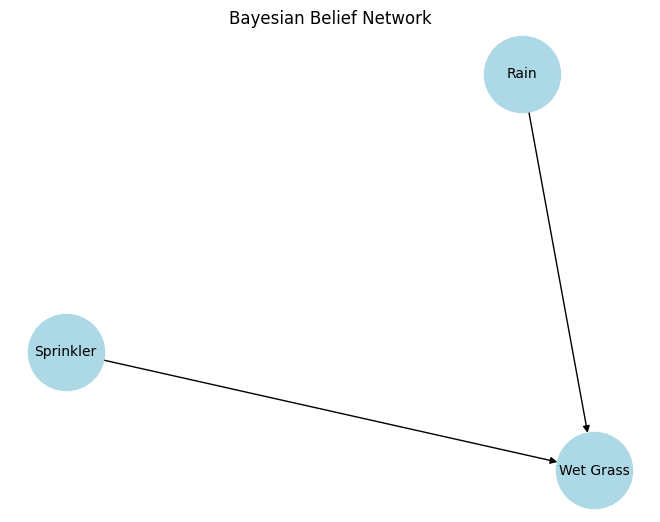

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork

# Assuming 'model' is your Bayesian Network object

# Get the edges from your Bayesian Network
# Instead of relying on the default iterator, explicitly convert the edges to a list
edges = list(model.edges())

# Create a NetworkX graph from the edges
graph = nx.DiGraph()  # Use DiGraph for directed edges in Bayesian Networks
graph.add_edges_from(edges)

# Now visualize using the NetworkX graph
nx.draw(graph, with_labels=True, node_size=3000, node_color='lightblue', font_size=10)
plt.title("Bayesian Belief Network")
plt.show()

##**K-Nearest Neighbor**
### **K-Nearest Neighbors (K-NN)**

---

#### **Introduction**
K-Nearest Neighbors (K-NN) is a simple and intuitive supervised machine learning algorithm used for both classification and regression tasks. It classifies data points based on the similarity (distance) to their nearest neighbors in the feature space.

---

### **How K-NN Works**
1. **Training Phase**: K-NN is a **lazy learner**, meaning it does not explicitly build a model during training. Instead, it stores the entire dataset.
2. **Prediction Phase**:
   - **For Classification**:
     - Identify the \($K$\) closest data points (neighbors) to the input.
     - Assign the class label that is most frequent among these neighbors.
   - **For Regression**:
     - Identify the \($K$\) nearest neighbors.
     - Predict the average (or weighted average) of the target values of these neighbors.

---

### **Key Components**
1. **K (Number of Neighbors)**:
   - A small \($K$\) (e.g., 1) can lead to overfitting.
   - A large \($K$\) can smooth out predictions but may underfit the data.

2. **Distance Metric**:
   - **Euclidean Distance** (most common):
     \[
     $d(p, q) = \sqrt{\sum_{i=1}^n (p_i - q_i)^2}$
     \]
   - **Manhattan Distance**:
     \[
     $d(p, q) = \sum_{i=1}^n |p_i - q_i|$
     \]
   - **Minkowski Distance** (generalized form):
     \[
     $d(p, q) = \left(\sum_{i=1}^n |p_i - q_i|^p\right)^{1/p}$
     \]
   - Other metrics include cosine similarity or Hamming distance.

3. **Weighting Neighbors**:
   - Assign weights to neighbors based on their distance. Closer neighbors may have more influence.

---

### **Advantages**
- Simple to understand and implement.
- No explicit training phase (lazy learner).
- Adaptable to classification and regression tasks.

---

### **Disadvantages**
- Computationally expensive during prediction, especially for large datasets.
- Sensitive to irrelevant or noisy features.
- Choice of \($K$\) and distance metric can significantly impact performance.

---

### **Steps to Implement K-NN**
1. **Choose \($K$\)**: Number of neighbors to consider.
2. **Compute Distances**: Calculate the distance from the input to all points in the training set.
3. **Find Nearest Neighbors**: Identify the \($K$\) nearest data points.
4. **Make Prediction**:
   - Classification: Take a majority vote of the neighbors.
   - Regression: Average the target values of the neighbors.

---

### **Applications**
1. **Classification**:
   - Handwritten digit recognition (e.g., MNIST dataset).
   - Spam email detection.
2. **Regression**:
   - Predicting house prices.
   - Estimating missing data values.
3. **Recommendation Systems**:
   - Suggesting products based on user preferences.

---

### **Tips for Effective K-NN Usage**
1. **Feature Scaling**:
   - K-NN is sensitive to the scale of features. Normalize or standardize the data.
   
   ```python
   from sklearn.preprocessing import StandardScaler
   scaler = StandardScaler()
   X_train = scaler.fit_transform(X_train)
   X_test = scaler.transform(X_test)
   ```
   
2. **Choose Optimal \(K\)**:
   - Use cross-validation to find the best \($K$\).

3. **Dimensionality Reduction**:
   - For high-dimensional datasets, consider PCA or feature selection to reduce dimensionality.

4. **Weight Neighbors**:
   - Use `weights='distance'` in `KNeighborsClassifier` to give closer neighbors more influence.

---

K-NN is a robust, straightforward algorithm, particularly effective for small datasets with clearly defined classes, but it requires careful tuning and preprocessing to achieve optimal performance on larger or noisier datasets.

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


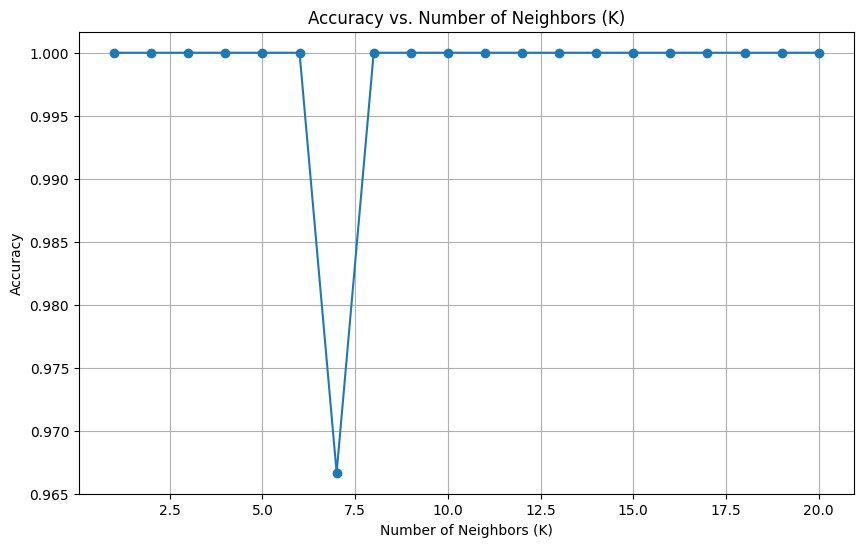

In [36]:
### **Python Implementation on Iris Dataset**

#### **Step 1: Load and Prepare the Dataset**

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Step 2: Train a K-NN Classifier**

# Initialize the K-NN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')  # Using Euclidean distance

# Train the model
knn.fit(X_train, y_train)

#### **Step 3: Evaluate the Model**

# Make predictions
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#### **Step 4: Experiment with Different Values of \(K\)**
import matplotlib.pyplot as plt

# Evaluate model performance for different values of K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, knn.predict(X_test)))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


##**Neural Networks**

#### **Introduction**
Neural networks are a class of machine learning models inspired by the structure and functioning of biological neural systems. They are designed to recognize patterns, learn from data, and make decisions. Neural networks are the foundation of deep learning, a subset of machine learning.

---

### **Basic Structure of a Neural Network**

A neural network consists of the following components:

1. **Input Layer**:
   - Receives data as input features.
   - Each neuron corresponds to a single feature.

2. **Hidden Layers**:
   - Composed of multiple layers of neurons that process the input data.
   - Apply weights, biases, and activation functions to learn patterns.
   - More layers and neurons increase the network's capacity to model complex data.

3. **Output Layer**:
   - Produces the final predictions or classifications.
   - Number of neurons depends on the type of task (e.g., one neuron for regression, multiple for classification).

---

### **How Neural Networks Work**
1. **Forward Propagation**:
   - Data flows through the network from the input layer to the output layer.
   - Each neuron computes a weighted sum of its inputs and applies an activation function.

2. **Activation Functions**:
   - Introduce non-linearity to the model, enabling it to learn complex patterns.
   - Common activation functions:
     - **Sigmoid**: \( f(x) = \frac{1}{1 + e^{-x}} \)
     - **ReLU (Rectified Linear Unit)**: \( f(x) = \max(0, x) \)
     - **Tanh**: \( f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} \)
     - **Softmax**: Converts outputs into probabilities (for multi-class classification).

3. **Loss Function**:
   - Measures the error between the predicted and actual values.
   - Common loss functions:
     - **Mean Squared Error (MSE)**: For regression.
     - **Cross-Entropy Loss**: For classification.

4. **Backpropagation**:
   - Computes the gradient of the loss function with respect to the network's weights and biases.
   - Uses optimization algorithms (e.g., Stochastic Gradient Descent) to update weights and minimize the loss.

---

### **Types of Neural Networks**
1. **Feedforward Neural Network (FNN)**:
   - Data flows in one direction from input to output.
   - Suitable for basic tasks like regression and classification.

2. **Convolutional Neural Network (CNN)**:
   - Specialized for image processing and computer vision tasks.
   - Uses convolutional layers to detect spatial patterns.

3. **Recurrent Neural Network (RNN)**:
   - Designed for sequential data (e.g., time series, text).
   - Maintains a "memory" by using feedback loops.

4. **Long Short-Term Memory (LSTM)**:
   - A type of RNN that addresses the problem of vanishing gradients.
   - Useful for tasks requiring long-term dependencies, like language modeling.

5. **Generative Adversarial Networks (GANs)**:
   - Consist of a generator and a discriminator.
   - Used for generating new data, like images or text.

6. **Autoencoders**:
   - Unsupervised networks used for dimensionality reduction and feature extraction.

---

### **Advantages**
- Can model complex, non-linear relationships.
- Highly scalable to large datasets.
- Effective for a wide range of applications, from image recognition to language processing.

---

### **Disadvantages**
- Require large amounts of data and computational resources.
- Can overfit without proper regularization techniques.
- Training can be time-consuming and requires careful hyperparameter tuning.

---

### **Applications**
1. **Computer Vision**:
   - Object detection, facial recognition, medical image analysis.
2. **Natural Language Processing (NLP)**:
   - Sentiment analysis, machine translation, chatbots.
3. **Speech Recognition**:
   - Voice assistants, transcription.
4. **Recommendation Systems**:
   - Product and content recommendations.
5. **Autonomous Systems**:
   - Self-driving cars, robotics.

---



Neural networks are powerful tools for solving complex problems. Understanding their components, tuning hyperparameters, and preprocessing data are essential for successful implementation.

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3317 - loss: 1.1174 - val_accuracy: 0.2083 - val_loss: 1.1280
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4450 - loss: 1.0113 - val_accuracy: 0.2083 - val_loss: 1.0908
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3623 - loss: 1.0156 - val_accuracy: 0.2500 - val_loss: 1.0561
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3703 - loss: 0.9765 - val_accuracy: 0.2917 - val_loss: 1.0255
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4330 - loss: 0.9313 - val_accuracy: 0.3750 - val_loss: 0.9973
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4819 - loss: 0.9291 - val_accuracy: 0.6250 - val_loss: 0.9683
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4694 - loss: 0.9119 - val_accuracy: 0.7500 - val_loss: 0.9434
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6746 - loss: 0.8445 - val_accuracy: 0.7500 - val_loss: 0.9186
Ep

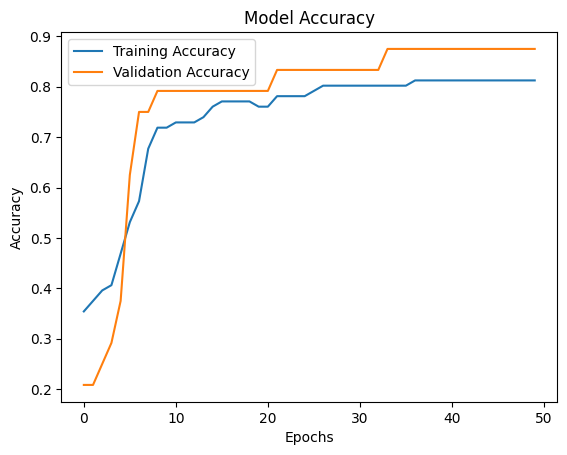

In [37]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# One-hot encode the target
# The 'sparse' argument has been removed in newer versions of scikit-learn.
# We now handle the sparse matrix directly using 'toarray()'.
encoder = OneHotEncoder(sparse_output=False) # sparse_output is an argument for >=1.2 <1.3.x
# For >=1.3.x, default is already sparse_output=False, so sparse_output is not required
# encoder = OneHotEncoder()

y = encoder.fit_transform(y.reshape(-1, 1))


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **Step 2: Build the Neural Network**
# Define the model
model = Sequential([
    Dense(10, input_dim=X_train.shape[1], activation='relu'),  # Hidden layer 1
    Dense(8, activation='relu'),                              # Hidden layer 2
    Dense(y.shape[1], activation='softmax')                   # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### **Step 3: Train the Neural Network**
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)

#### **Step 4: Evaluate the Model**
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

#### **Step 5: Visualize Training Performance**
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Optimal Classification Algorithms**

There is no universally "optimal" classification algorithm for all problems, as performance depends on the dataset characteristics, including size, feature complexity, and noise. Instead, selecting the best algorithm involves experimentation, evaluation, and understanding the trade-offs of each approach.

---

### **Factors Affecting Choice of Classification Algorithm**
1. **Dataset Size**:
   - Large datasets may favor complex models like neural networks.
   - Small datasets may perform better with simpler models like Naive Bayes.

2. **Feature Dimensionality**:
   - High-dimensional data might require dimensionality reduction techniques.
   - Algorithms like SVM with a kernel or L1-regularized models work well with high-dimensional features.

3. **Class Imbalance**:
   - Algorithms like Random Forest and Gradient Boosting handle imbalanced data better.
   - Use techniques like SMOTE for preprocessing or adjusting class weights.

4. **Interpretability**:
   - If interpretability is crucial, choose models like Decision Trees or Logistic Regression.

5. **Non-linearity**:
   - Linear models (e.g., Logistic Regression, Linear SVM) are suited for linearly separable data.
   - Complex, non-linear decision boundaries require models like Random Forest, SVM with RBF kernel, or Neural Networks.

---

### **Commonly Used Classification Algorithms**

#### **1. Logistic Regression**
- **Best for**: Linearly separable data.
- **Advantages**:
  - Easy to interpret.
  - Works well with small datasets.
- **Disadvantages**:
  - Struggles with non-linear decision boundaries.
- **Example Use Case**: Predicting binary outcomes (e.g., spam detection).

---

#### **2. Decision Trees**
- **Best for**: Interpretable models and small-to-medium datasets.
- **Advantages**:
  - Easy to understand.
  - Handles categorical and continuous features.
- **Disadvantages**:
  - Prone to overfitting (use pruning or ensemble methods to mitigate).
- **Example Use Case**: Credit approval systems.

---

#### **3. Support Vector Machines (SVM)**
- **Best for**: High-dimensional data and smaller datasets.
- **Advantages**:
  - Works well with both linear and non-linear data using kernels.
  - Robust to overfitting with proper regularization.
- **Disadvantages**:
  - Computationally expensive for large datasets.
- **Example Use Case**: Image classification with a small number of features.

---

#### **4. K-Nearest Neighbors (K-NN)**
- **Best for**: Small datasets where interpretability isn’t critical.
- **Advantages**:
  - Simple and non-parametric.
  - Adapts naturally to complex decision boundaries.
- **Disadvantages**:
  - Computationally expensive for large datasets.
  - Sensitive to irrelevant features.
- **Example Use Case**: Pattern recognition in healthcare diagnostics.

---

#### **5. Naive Bayes**
- **Best for**: Text data and problems with conditional independence.
- **Advantages**:
  - Fast and simple.
  - Works well for high-dimensional, sparse data.
- **Disadvantages**:
  - Assumes feature independence, which might not hold.
- **Example Use Case**: Sentiment analysis, email classification.

---

#### **6. Random Forest**
- **Best for**: Medium to large datasets with non-linear relationships.
- **Advantages**:
  - Handles missing values and outliers.
  - Reduces overfitting with ensemble methods.
- **Disadvantages**:
  - Less interpretable than single decision trees.
- **Example Use Case**: Fraud detection.

---

#### **7. Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost)**
- **Best for**: Complex datasets with non-linear relationships.
- **Advantages**:
  - Highly accurate.
  - Supports fine-tuning and feature importance analysis.
- **Disadvantages**:
  - Computationally intensive and sensitive to hyperparameters.
- **Example Use Case**: Predicting customer churn.

---

#### **8. Neural Networks**
- **Best for**: Large datasets with non-linear and complex relationships.
- **Advantages**:
  - Highly flexible and capable of capturing intricate patterns.
  - Can work with raw features (e.g., images, audio).
- **Disadvantages**:
  - Requires significant data and computational power.
  - Less interpretable.
- **Example Use Case**: Image and speech recognition.

---

#### **9. Ensemble Methods (Bagging, Boosting, Stacking)**
- **Best for**: Improving performance by combining multiple models.
- **Advantages**:
  - Reduces overfitting and variance.
  - Generally more accurate than individual models.
- **Disadvantages**:
  - Computationally expensive.
  - May lose interpretability.
- **Example Use Case**: Predictive analytics in healthcare.

---

### **Evaluation Metrics for Classification**
- **Accuracy**: Fraction of correct predictions.
- **Precision**: Relevant positives out of predicted positives.
- **Recall (Sensitivity)**: Relevant positives out of actual positives.
- **F1-Score**: Harmonic mean of precision and recall.
- **ROC-AUC**: Trade-off between true positive rate and false positive rate.
- **Confusion Matrix**: Detailed breakdown of predictions.

---

### **Steps to Choose the Best Classifier**
1. **Understand the Data**:
   - Check the dataset size, dimensionality, and feature types.
2. **Preprocess the Data**:
   - Handle missing values, scale features, and encode categorical variables.
3. **Experiment with Algorithms**:
   - Try several algorithms, starting with simple ones (Logistic Regression, Decision Trees).
4. **Hyperparameter Tuning**:
   - Use techniques like grid search or random search.
5. **Evaluate Models**:
   - Use cross-validation and metrics like F1-score or ROC-AUC.
6. **Test on Unseen Data**:
   - Evaluate final performance on a hold-out test set.

---



By carefully evaluating algorithms and preprocessing data, you can identify the optimal classifier for your specific task.

In [38]:
### **Python Example: Comparing Classifiers on Iris Dataset**
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel='rbf', probability=True),
    "K-NN": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--- Random Forest ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--- SVM ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2 

## **Support Vector Machine (SVM)**

---

#### **Introduction**
Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification and regression tasks. It is particularly effective for high-dimensional datasets and is known for its ability to find the optimal hyperplane that separates data into different classes.

---

### **Key Concepts in SVM**

1. **Hyperplane**:
   - A decision boundary that separates data points belonging to different classes.
   - In a 2D space, it is a line; in 3D space, it is a plane.

2. **Margin**:
   - The distance between the hyperplane and the nearest data points from either class.
   - SVM aims to maximize this margin, creating a robust decision boundary.

3. **Support Vectors**:
   - Data points closest to the hyperplane, which determine its position and orientation.

4. **Kernel Trick**:
   - A method to transform non-linearly separable data into a higher-dimensional space where it becomes linearly separable.
   - Common kernels:
     - **Linear Kernel**: No transformation (for linearly separable data).
     - **Polynomial Kernel**: Maps data using polynomial functions.
     - **Radial Basis Function (RBF)**: Measures similarity using Gaussian functions.
     - **Sigmoid Kernel**: Similar to a neural network's activation function.

5. **Slack Variables**:
   - Introduced in soft-margin SVM to allow some misclassifications, improving performance on noisy data.

---

### **Types of SVM**

1. **Linear SVM**:
   - Used when data is linearly separable.
   - Finds a straight-line decision boundary in the feature space.

2. **Non-Linear SVM**:
   - Used for datasets that are not linearly separable.
   - Employs kernel functions to transform data into a higher-dimensional space.

---

### **Advantages**
- Effective in high-dimensional spaces.
- Works well for clear margin separation.
- Memory efficient, as it uses only support vectors.

---

### **Disadvantages**
- Computationally expensive for large datasets.
- Choosing the right kernel and tuning hyperparameters can be challenging.
- Less effective for overlapping classes without proper tuning.

---

### **Applications**
- **Text Classification**: Spam filtering, sentiment analysis.
- **Image Recognition**: Handwriting recognition, facial expression classification.
- **Bioinformatics**: Protein classification, gene classification.

---



SVMs are powerful tools for classification tasks, especially when the data is high-dimensional or the decision boundaries are complex. Proper preprocessing and parameter tuning can significantly improve their performance.

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy with Linear Kernel: 0.9666666666666667
Accuracy with Polynomial Kernel: 0.9666666666666667
Accuracy with RBF Kernel: 1.0
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ................

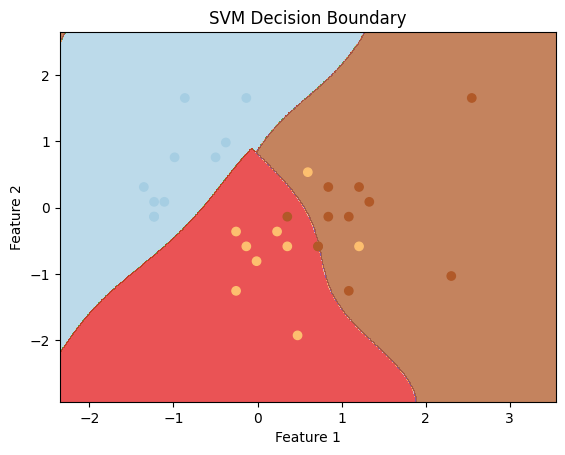

In [39]:
### **Python Implementation of SVM (Iris Dataset)**

#### **Step 1: Load and Preprocess Data**

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **Step 2: Train SVM**
# Create and train the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')  # RBF kernel
svm_model.fit(X_train, y_train)

#### **Step 3: Evaluate the Model**
# Predict on test set
y_pred = svm_model.predict(X_test)

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#### **Step 4: Experiment with Kernels**
#You can experiment with different kernel types to see their impact:

# Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
print("Accuracy with Linear Kernel:", svm_linear.score(X_test, y_test))

# Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(X_train, y_train)
print("Accuracy with Polynomial Kernel:", svm_poly.score(X_test, y_test))

# RBF Kernel (default)
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
print("Accuracy with RBF Kernel:", svm_rbf.score(X_test, y_test))

### **Hyperparameter Tuning**
#Key parameters to tune in SVM:
#1. **C (Regularization)**:
#   - Controls trade-off between maximizing margin and minimizing classification error.
#   - Larger values penalize misclassifications more.
#2. **Gamma** (for RBF kernel):
#   - Defines the influence of a single training example.
#   - Larger values fit data more closely but may lead to overfitting.

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Perform grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

# Evaluate the best model
best_model = grid.best_estimator_
print("Test Set Accuracy:", best_model.score(X_test, y_test))

### **Visualization of Decision Boundaries**
#For 2D datasets, you can visualize SVM's decision boundary.

import numpy as np
import matplotlib.pyplot as plt

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(
        np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, 0.01),
        np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, 0.01)
    )
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.title("SVM Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Use first two features of Iris for simplicity
svm_model.fit(X_train[:, :2], y_train)
plot_decision_boundary(X_test[:, :2], y_test, svm_model)
